## 1. isCanceled相關性分析
### 1.1. 各 feature 和 isCanceled 的相關性

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

training_set = pd.read_csv('../data/train_origin.csv')

exclude_columns = [
        "ID",
        "reservation_status",
        "reservation_status_date",
        "arrival_date_year",
        'arrival_date_week_number',
        'arrival_date_day_of_month'
    ]

categoryFeatures = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'required_car_parking_spaces'
]

training_set = training_set.drop(exclude_columns, axis=1)
training_set = training_set.fillna(value=0)
for feature in categoryFeatures:
    training_set[feature] = training_set[feature].apply(lambda x:str(x))
    training_set[feature] = training_set[feature].astype('category').cat.codes

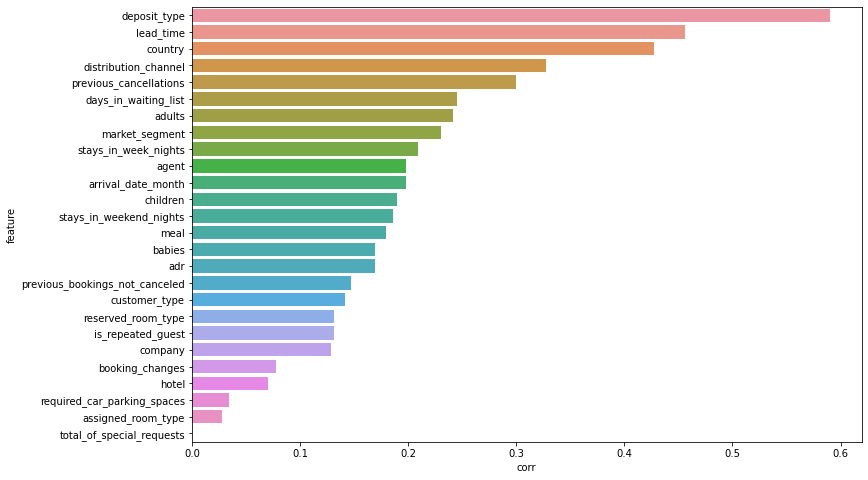

In [2]:
corr = training_set.corr()['is_canceled'].sort_values(ascending=False)

plt.subplots(figsize=(12,8))
corr = pd.DataFrame(corr).reset_index()
corr.columns = ['feature', 'corr']
corr['corr'] = (corr['corr']-corr['corr'].min())/(corr['corr'].max()-corr['corr'].min())

sns.barplot(data=corr[1:], x='corr', y='feature')
plt.show()

### 1.3 Random Forest 重要性分析

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(training_set.drop('is_canceled', axis=1))
model.fit(df,training_set.is_canceled)

RandomForestRegressor(max_depth=10, random_state=1)

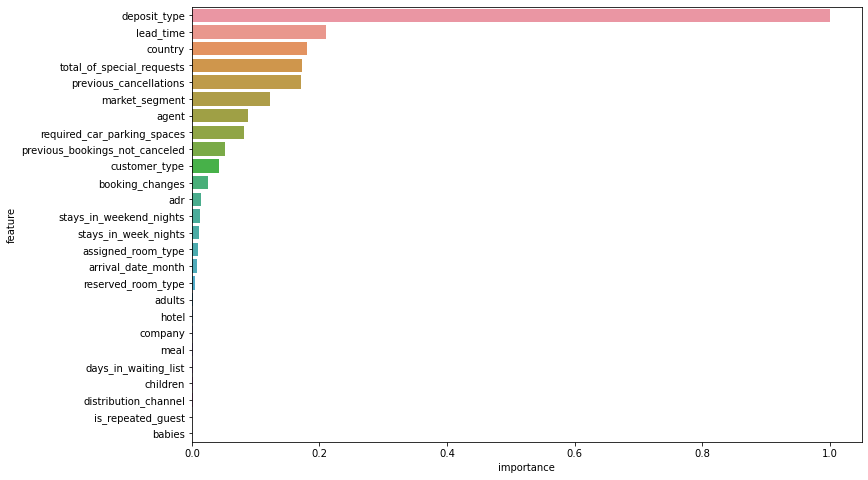

In [12]:
features = df.columns
importances = model.feature_importances_

plt.subplots(figsize=(12,8))
features = pd.DataFrame(features, columns=['feature'])
importances = pd.DataFrame(importances, columns=['importance'])
importances = pd.concat([features, importances], axis=1).sort_values(by='importance', ascending=False)
importances['importance'] = (importances['importance']-importances['importance'].min())/(importances['importance'].max()-importances['importance'].min())

sns.barplot(data=importances, x='importance', y='feature')
plt.show()